In [1]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob
from scipy import stats

sys.path.append('../../')
from utils import dataframe_utils, clustering_utils

In [2]:
norm_type = 'min_max'
# norm_type = 'z_score'

microarray_data_pattern = f'./2024-08-08_microarray/{norm_type}/**/*.csv'

rna_seq_data_pattern = f'./2024-08-08_rna_seq/{norm_type}/**/*.csv'

microarray_stats_files = glob.glob(microarray_data_pattern)

rna_seq_stats_files = glob.glob(rna_seq_data_pattern)

microarray_stats_df = dataframe_utils.csv_files_to_df(microarray_stats_files)

rna_seq_stats_df = dataframe_utils.csv_files_to_df(rna_seq_stats_files)

In [3]:
microarray_stats_files

['./2024-08-08_microarray/min_max/nc/microarray_min_max_NC_manhattan_3_2024-08-13_00-25-21.537267_scan_stats.csv',
 './2024-08-08_microarray/min_max/nc/microarray_min_max_TNC_manhattan_3_2024-08-13_12-42-16.571431_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_manhattan_9_2024-08-12_18-27-18.970980_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_manhattan_12_2024-08-12_18-27-18.971147_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_manhattan_11_2024-08-12_18-27-18.971101_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_manhattan_4_2024-08-12_18-27-18.971335_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_manhattan_10_2024-08-12_18-27-18.971166_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_manhattan_7_2024-08-12_18-27-18.971115_scan_stats.csv',
 './2024-08-08_microarray/min_max/exp/microarray_min_max_EXP_man

In [4]:
rna_seq_stats_files

['./2024-08-08_rna_seq/min_max/nc/rna_seq_min_max_NC_manhattan_3_2024-08-13_00-25-21.934158_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/nc/rna_seq_min_max_TNC_manhattan_3_2024-08-13_12-42-16.627921_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_12_2024-08-12_18-27-18.971908_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_3_2024-08-12_18-14-49.429985_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_11_2024-08-12_18-27-18.971566_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_10_2024-08-12_18-27-18.971937_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_8_2024-08-12_18-27-18.971183_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_5_2024-08-12_18-27-18.971532_scan_stats.csv',
 './2024-08-08_rna_seq/min_max/exp/rna_seq_min_max_EXP_manhattan_6_2024-08-12_18-27-18.971211_scan_stats.csv',
 

In [5]:
microarray_stats_df['fraction_clusters_enriched'] = microarray_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [6]:
rna_seq_stats_df['fraction_clusters_enriched'] = rna_seq_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [7]:
rna_seq_stats_df.shape, microarray_stats_df.shape

((4352, 34), (4561, 34))

1000 1000
-0.041620606602298736 0.07000246374937542
2.516054306398648e-06 2.391110625977623e-06
T-statistic: 146.6084605112741, P-value: 0.0
Z-score: 28.09164251124537, P-value: 0.0


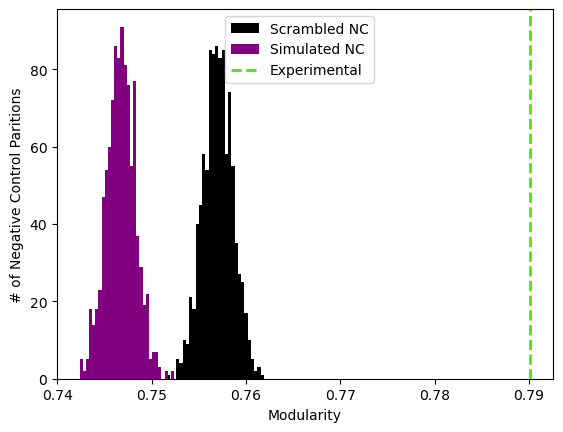

1000 1000
-0.05979794473665727 -0.05252665705552834
2.126289386801363e-06 2.194249421358458e-06
T-statistic: 44.20562905898, P-value: 2.9104750152338234e-298
Z-score: 88.24575847825123, P-value: 0.0


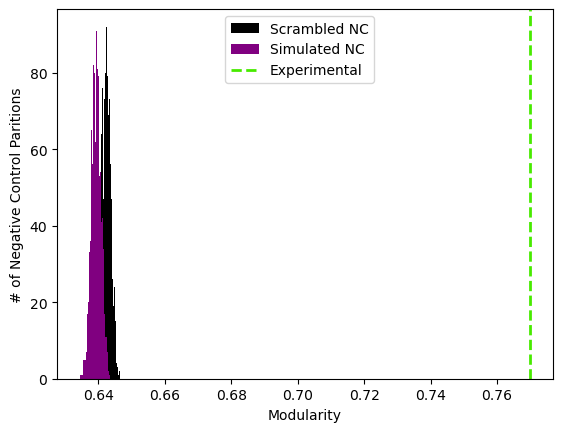

In [8]:
import statistics

dfs = {'rna_seq': rna_seq_stats_df, 'microarray': microarray_stats_df}

for name, df_stats in dfs.items():

    df_stats_exp = df_stats.loc[
        (df_stats['partition_type'] == 'EXP')
        &
        (df_stats['metric'] == 'manhattan')
        &
        (df_stats['nns'] == 3)
        &
        (df_stats['parameter'] == 0.005)
                                ]
    
    df_stats_nc = df_stats.loc[df_stats['partition_type'] == 'NC']
    df_stats_tnc = df_stats.loc[df_stats['partition_type'] == 'TNC']
    # hist_clustering_metric = 'silhouette_score'
    hist_clustering_metric = 'modularity'

    hist_data = np.random.choice(list(df_stats_nc[hist_clustering_metric].values), 1000, replace=False) 
    # hist_data = df_stats_nc[hist_clustering_metric].values
    hist_data_tnc = np.random.choice(list(df_stats_tnc[hist_clustering_metric].values), 1000, replace=False) 
    # hist_data_tnc = df_stats_tnc[hist_clustering_metric].values
    exp_line_at_x = df_stats_exp[hist_clustering_metric].values[0]
    exp_line_at_x
    # tnc_line_at_x = df_stats_tnc[hist_clustering_metric].values[0]
    # tnc_line_at_x

    print(len(hist_data), len(hist_data_tnc))

    print(stats.skew(hist_data), stats.skew(hist_data_tnc))

    print(statistics.variance(hist_data), statistics.variance(hist_data_tnc))

    # Create the histogram
    plt.hist(hist_data, bins=30, color='black', label='Scrambled NC')
    plt.hist(hist_data_tnc, bins=30, color='purple', label='Simulated NC')

    t_stat, p_value = stats.ttest_ind(hist_data, hist_data_tnc)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Calculate z-score
    z_score = (exp_line_at_x - np.mean(hist_data_tnc)) / np.std(hist_data_tnc)
    # Calculate p-value for a two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    print(f"Z-score: {z_score}, P-value: {p_value}")

    # Add a vertical line at the specified x value
    # plt.axvline(x=exp_line_at_x, color='red', linestyle='dashed', linewidth=2, label='EXP at x={} ($P$ < 0.001)'.format(round(exp_line_at_x, 2)))
    # plt.axvline(x=tnc_line_at_x, color='blue', linestyle='dashed', linewidth=2, label='TNC at x={}'.format(round(tnc_line_at_x, 2)))
    plt.axvline(x=exp_line_at_x, color='#47EA00', linestyle='dashed', linewidth=2, label='Experimental')
    # plt.axvline(x=tnc_line_at_x, color='purple', linestyle='dashed', linewidth=2, label='TNC')


    # Add labels and title
    plt.xlabel(hist_clustering_metric.capitalize())
    plt.ylabel('# of Negative Control Paritions')
    # plt.title(f'{len(hist_data)} Neg. Controls vs. Experimental {hist_clustering_metric.capitalize()} Distribution')

    plt.legend(bbox_to_anchor=(0.325, 1))

    plt.savefig(f'{name}_{norm_type}_mod_plot.svg', format='svg')

    plt.show()

In [9]:
df_stats_nc['silhouette_score'].mean()

-0.05311445028803653

In [10]:
df_stats_nc['silhouette_score'].median()

-0.0530013598211022

In [11]:
df_stats_nc['silhouette_score'].max()

-0.0487132748356032

In [12]:
df_stats_nc['modularity'].mean()

0.6422849595374144

In [13]:
df_stats_nc['modularity'].median()

0.6423189927811974

In [14]:
df_stats_nc['modularity'].max()

0.6466359981164015

In [15]:
nc_mean = df_stats_nc[hist_clustering_metric].mean()
nc_std = df_stats_nc[hist_clustering_metric].std()

nc_se = nc_std / (np.sqrt(len(hist_data)))

nc_mean, nc_std, nc_se

(0.6422849595374144, 0.0014381399276310362, 4.5477977653437954e-05)

In [16]:
t_stat = (exp_line_at_x - nc_mean) / nc_se

d_freedom = len(hist_data) - 1

t_stat, d_freedom

(2809.205415504296, 999)

In [17]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
p_value

0.0

In [18]:
p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)
p_value

0.0

In [19]:
alpha = 0.05
alpha

0.05

In [20]:
p_value < alpha

True